In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# Loading all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter


# Retrieving and Preparing Data

In [105]:
# Importing the datasets
df_train= pd.read_csv(r'/content/drive/MyDrive/DIA_trainingset_RDKit_descriptors.csv')
df_test= pd.read_csv(r'/content/drive/MyDrive/DIA_testset_RDKit_descriptors.csv')

In [106]:
df_train

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,...,0,0,0,0,0,0,0,0,0,0
1,0,C[C@H](N(O)C(=O)N)c1cc2ccccc2s1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,...,0,0,0,0,0,0,0,1,0,1
2,0,C[N+](C)(C)CC(=O)[O-],3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,...,0,0,0,0,0,0,0,0,0,0
3,1,CC(C)n1c(\C=C\[C@H](O)C[C@H](O)CC(=O)O)c(c2ccc...,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,...,0,0,0,0,0,0,0,0,0,0
4,1,C\C(=C(\C#N)/C(=O)Nc1ccc(cc1)C(F)(F)F)\O,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0,C(C1=NCCN1)c2cccc3ccccc23,2.022,537.932,10.795,9.110,9.110,7.933,5.672,5.672,...,0,0,0,0,0,0,0,0,0,0
473,0,C[N@+]1(CC2CC2)CC[C@]34[C@H]5Oc6c(O)ccc(C[C@@H...,1.602,848.658,17.897,15.202,15.202,12.389,10.003,10.003,...,0,0,0,0,0,0,0,0,0,0
474,1,CO\N=C(/C(=O)N[C@H]1[C@H]2SCC(=C(N2C1=O)C(=O)O...,1.766,910.031,21.129,14.986,15.802,13.845,8.129,9.178,...,1,0,0,0,0,0,0,0,0,0
475,0,Clc1ccc(CO\N=C(\Cn2ccnc2)/c3ccc(Cl)cc3Cl)c(Cl)c1,1.831,926.191,18.518,13.372,16.396,12.525,7.566,9.078,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_test

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,C[C@H](\C=C\[C@H](O)C1CC1)[C@@H]2CC[C@@H]3\C(=...,1.484,743.207,21.466,18.764,18.764,14.292,12.106,12.106,...,0,0,0,0,0,0,0,0,0,0
1,1,OCCN1CCN(CCCN2c3ccccc3Sc4ccc(cc24)C(F)(F)F)CC1,1.472,868.947,21.140,16.736,17.553,14.453,10.268,11.084,...,0,0,0,0,0,0,0,0,0,0
2,0,C[C@@H]1O[C@H](C[C@H](O)[C@@H]1O)O[C@@H]2[C@H]...,0.837,1409.004,39.189,32.904,32.904,26.011,20.941,20.941,...,0,0,0,0,0,0,0,0,0,0
3,1,NC(=O)Cc1cccc(C(=O)c2ccccc2)c1N,2.406,621.298,13.828,10.297,10.297,9.092,5.847,5.847,...,0,0,0,0,0,0,0,0,0,0
4,0,COc1cc2c(CCN[C@]23CS[C@@H]4[C@@H]5[C@@H]6N(C)[...,1.320,2127.996,37.955,30.849,31.666,25.910,18.066,19.115,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,CCN1CCN(C(=O)N[C@H](C(=O)N[C@@H]2[C@@H]3SC(C)(...,1.508,1127.109,26.361,19.925,20.742,16.973,11.450,12.330,...,1,0,0,0,0,0,0,0,0,1
116,0,CC1=C(C=C(C#N)C(=O)N1)c2ccncc2,2.678,608.396,11.544,8.689,8.689,7.720,4.765,4.765,...,0,0,0,0,0,0,0,0,0,0
117,0,CCCN(CCc1cccs1)[C@@H]2CCc3c(O)cccc3C2,1.670,593.488,15.364,13.294,14.110,10.775,8.338,9.217,...,0,0,0,0,0,0,0,1,0,0
118,0,COCCOC(=O)C1=C(C)NC(=C([C@@H]1c2cccc(c2)[N+](=...,2.603,902.371,22.422,17.683,17.683,14.167,9.469,9.469,...,0,0,0,0,0,0,0,0,1,0


In [108]:
# Basic data checks
df_train.head()

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,...,0,0,0,0,0,0,0,0,0,0
1,0,C[C@H](N(O)C(=O)N)c1cc2ccccc2s1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,...,0,0,0,0,0,0,0,1,0,1
2,0,C[N+](C)(C)CC(=O)[O-],3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,...,0,0,0,0,0,0,0,0,0,0
3,1,CC(C)n1c(\C=C\[C@H](O)C[C@H](O)CC(=O)O)c(c2ccc...,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,...,0,0,0,0,0,0,0,0,0,0
4,1,C\C(=C(\C#N)/C(=O)Nc1ccc(cc1)C(F)(F)F)\O,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df_test.head()

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,C[C@H](\C=C\[C@H](O)C1CC1)[C@@H]2CC[C@@H]3\C(=...,1.484,743.207,21.466,18.764,18.764,14.292,12.106,12.106,...,0,0,0,0,0,0,0,0,0,0
1,1,OCCN1CCN(CCCN2c3ccccc3Sc4ccc(cc24)C(F)(F)F)CC1,1.472,868.947,21.140,16.736,17.553,14.453,10.268,11.084,...,0,0,0,0,0,0,0,0,0,0
2,0,C[C@@H]1O[C@H](C[C@H](O)[C@@H]1O)O[C@@H]2[C@H]...,0.837,1409.004,39.189,32.904,32.904,26.011,20.941,20.941,...,0,0,0,0,0,0,0,0,0,0
3,1,NC(=O)Cc1cccc(C(=O)c2ccccc2)c1N,2.406,621.298,13.828,10.297,10.297,9.092,5.847,5.847,...,0,0,0,0,0,0,0,0,0,0
4,0,COc1cc2c(CCN[C@]23CS[C@@H]4[C@@H]5[C@@H]6N(C)[...,1.320,2127.996,37.955,30.849,31.666,25.910,18.066,19.115,...,1,0,0,0,0,0,0,0,0,0


In [110]:
print(df_train.shape,  df_test.shape)

(477, 198) (120, 198)


In [111]:
df_train.describe()

,Label,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,...,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.0,477.000000,477.000000,477.000000
mean,0.247379,2.142618,738.629776,18.130015,14.372379,14.886985,11.874170,8.433990,8.963610,6.672302,...,0.054507,0.050314,0.014675,0.006289,0.008386,0.031447,0.0,0.027254,0.327044,0.027254
std,0.431942,0.710916,392.967592,7.247300,6.093945,6.134658,4.828675,3.756045,3.813948,3.282600,...,0.245047,0.245944,0.120375,0.079138,0.091285,0.186342,0.0,0.175409,1.372740,0.162993
min,0.000000,0.986000,8.000000,3.414000,1.725000,1.725000,1.732000,0.612000,0.612000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,1.679000,493.255000,13.405000,10.391000,10.763000,8.724000,5.807000,6.340000,4.399000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,1.964000,712.423000,17.646000,14.184000,14.683000,11.770000,8.351000,8.997000,6.362000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,2.419000,943.190000,22.052000,17.730000,18.216000,14.507000,10.588000,11.128000,8.554000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,5.083000,2430.934000,50.120000,38.475000,39.837000,31.516000,23.166000,24.440000,19.352000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.0,2.000000,18.000000,1.000000


In [112]:
df_test.describe()

,Label,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.0,120.000000,120.000000,120.000000
mean,0.250000,2.145058,805.967508,19.685075,15.659142,16.107367,12.853417,9.127392,9.525583,7.308517,...,0.075000,0.008333,0.008333,0.016667,0.02500,0.008333,0.0,0.033333,0.358333,0.016667
std,0.434828,0.778106,443.927519,7.660753,6.308209,6.407406,5.096673,3.834029,3.917699,3.441829,...,0.294558,0.091287,0.091287,0.128556,0.15678,0.091287,0.0,0.222035,1.268863,0.128556
min,0.000000,0.837000,2.000000,2.000000,0.908000,0.908000,1.000000,0.204000,0.204000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,1.675500,556.210750,15.267000,12.633750,12.853000,10.237000,7.363000,7.685750,5.608250,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,1.946000,740.543500,18.629500,15.223500,15.568000,12.194500,8.814000,9.257500,7.084500,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.250000,2.353750,985.427000,23.656750,18.120000,18.533500,14.867000,10.832750,11.087750,8.987000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,5.079000,2629.395000,48.141000,41.328000,41.328000,32.350000,23.269000,23.269000,18.816000,...,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0,2.000000,9.000000,1.000000


In [113]:
# Chcking for missing values
df_train.isnull().sum()

,0
Label,0
SMILES,0
BalabanJ,0
BertzCT,0
Chi0,0
...,...
fr_thiazole,0
fr_thiocyan,0
fr_thiophene,0
fr_unbrch_alkane,0


In [114]:
df_test.isnull().sum()

,0
Label,0
SMILES,0
BalabanJ,0
BertzCT,0
Chi0,0
...,...
fr_thiazole,0
fr_thiocyan,0
fr_thiophene,0
fr_unbrch_alkane,0


In [115]:
# Check for NaN values
df_train.isna().sum()

,0
Label,0
SMILES,0
BalabanJ,0
BertzCT,0
Chi0,0
...,...
fr_thiazole,0
fr_thiocyan,0
fr_thiophene,0
fr_unbrch_alkane,0


In [116]:
df_test.isna().sum()

,0
Label,0
SMILES,0
BalabanJ,0
BertzCT,0
Chi0,0
...,...
fr_thiazole,0
fr_thiocyan,0
fr_thiophene,0
fr_unbrch_alkane,0


In [117]:
# Check for duplicates
df_train.duplicated().sum()
df_test.duplicated().sum()

np.int64(0)

In [118]:
print(df_train.shape, df_test.shape)

(477, 198) (120, 198)


In [119]:
# Splitting the data intp X_train, y_train and X_test, y_test
X_train = df_train.iloc[:, 2:]
Y_train = df_train.iloc[:, 0]
X_test = df_test.iloc[:, 2:]
Y_test = df_test.iloc[:, 0]

# Check the shape of the data
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(477, 196) (477,)
(120, 196) (120,)


In [120]:
# Checking for zero variance features using Variance Threshold
# Trying to set variance threshold to remove features with low variance
from sklearn.feature_selection import VarianceThreshold

# Step 1: Use X_train directly (already excludes Label & SMILES)
# Step 2: Fit selector to X_train
selector = VarianceThreshold(threshold=0)
selector.fit(X_train)

# Step 3: Get feature names that were retained
selected_features = X_train.columns[selector.get_support()]

# Step 4: Transform X_train to drop zero-variance features
X_train_filtered = pd.DataFrame(
    selector.transform(X_train),
    columns=selected_features,
    index=X_train.index
)

# Print shapes before and after
print("Original X_train shape:", X_train.shape)
print("Filtered X_train shape:", X_train_filtered.shape)

# Renaming X_train_filtered to X_train
X_train = X_train_filtered

# Y_train remains unchanged


Original X_train shape: (477, 196)
Filtered X_train shape: (477, 179)


In [121]:
print(X_train.shape, Y_train.shape)

(477, 179) (477,)


Data Exploration

In [122]:
X_train.head()

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,6.668,6.668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,3.545,4.661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,2.820,2.820,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,7.662,7.662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,3.601,3.601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# Extracting specific columns from the dataset, based purely off of research
# The extracted columns represent the psychicochemical and functinal properties present in most DIA drugs as established in the literature

columns_to_keep = [
    'MolWt',
    'ExactMolWt',
    'TPSA',
    'MolLogP',
    'NumHAcceptors',
    'NumHDonors',
    'NumRotatableBonds',
    'NumAromaticRings',
    'fr_Ar_NH',
    'fr_aniline',
    'fr_phos_acid',
    'fr_phos_ester',
    'fr_sulfonamd',
    'fr_sulfone',
    'fr_SH',
    'fr_nitro',
    'fr_nitro_arom',
    'fr_nitro_arom_nonortho',
    'fr_sulfide',
    'fr_thiazole',
    'fr_pyridine',
    'Chi0',
    'Chi0v',
    'Chi1',
    'Chi1v',
    'Chi2n',
    'Chi2v'
]

X_train = X_train[columns_to_keep]
X_train.shape

(477, 27)

# Data Exploration

In [124]:
# For easy visualization
X_train['Label'] = Y_train.values
eda_data = X_train.copy()

<ipython-input-124-c895d937bbf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Label'] = Y_train.values


<ipython-input-125-1f2c0389aeb0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='MolWt', data=eda_data, palette='Set2')


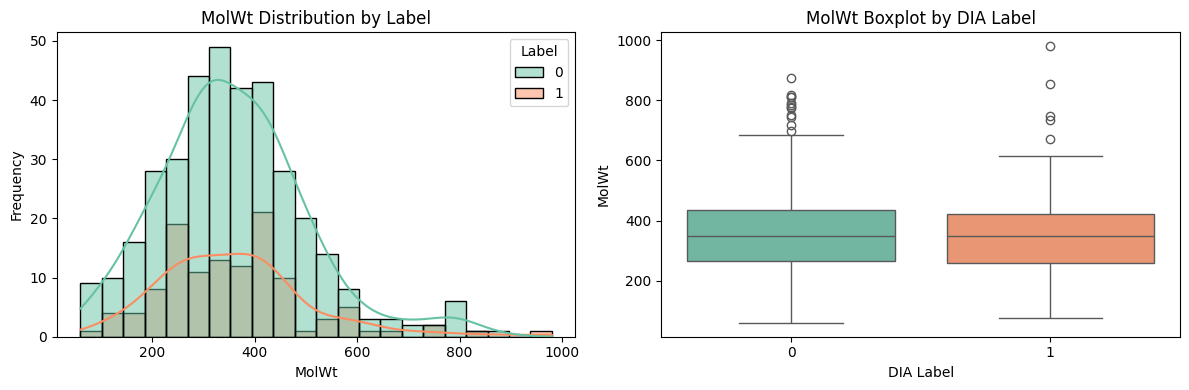

In [125]:
# MolWt

plt.figure(figsize=(12, 4))

# Histogram + KDE (left)
plt.subplot(1, 2, 1)
sns.histplot(data=eda_data, x='MolWt', kde=True, hue='Label', palette='Set2')
plt.title('MolWt Distribution by Label')
plt.xlabel('MolWt')
plt.ylabel('Frequency')

# Boxplot (right)
plt.subplot(1, 2, 2)
sns.boxplot(x='Label', y='MolWt', data=eda_data, palette='Set2')
plt.title('MolWt Boxplot by DIA Label')
plt.xlabel('DIA Label')
plt.ylabel('MolWt')

plt.tight_layout()
plt.show()


* Obersvation: DIA-positive drugs tend to be slightly heavier. Molecular weight might offer modest predictive power.

* Note: Both DIA+ and DIA– drop off after 800, hence am filtering them from the dataset

<ipython-input-126-42e83fdd02c9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='ExactMolWt', data=eda_data, palette='Set2')


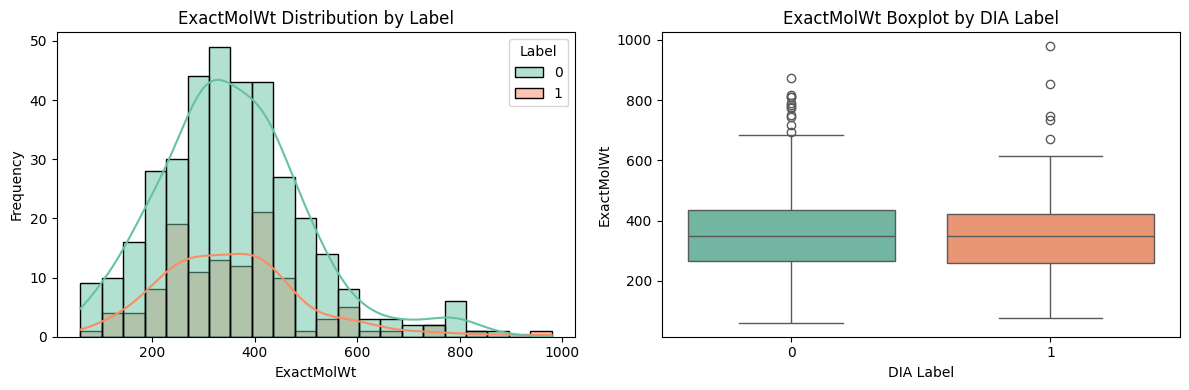

In [126]:
plt.figure(figsize=(12, 4))

# Histogram + KDE (left)
plt.subplot(1, 2, 1)
sns.histplot(data=eda_data, x='ExactMolWt', kde=True, hue='Label', palette='Set2')
plt.title('ExactMolWt Distribution by Label')
plt.xlabel('ExactMolWt')
plt.ylabel('Frequency')

# Boxplot (right)
plt.subplot(1, 2, 2)
sns.boxplot(x='Label', y='ExactMolWt', data=eda_data, palette='Set2')
plt.title('ExactMolWt Boxplot by DIA Label')
plt.xlabel('DIA Label')
plt.ylabel('ExactMolWt')

plt.tight_layout()
plt.show()


* Almost identical to MolWt, just slightly sharper, could be dropped

<ipython-input-127-4387d6eb66ee>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='TPSA', data=eda_data, palette='Set2')


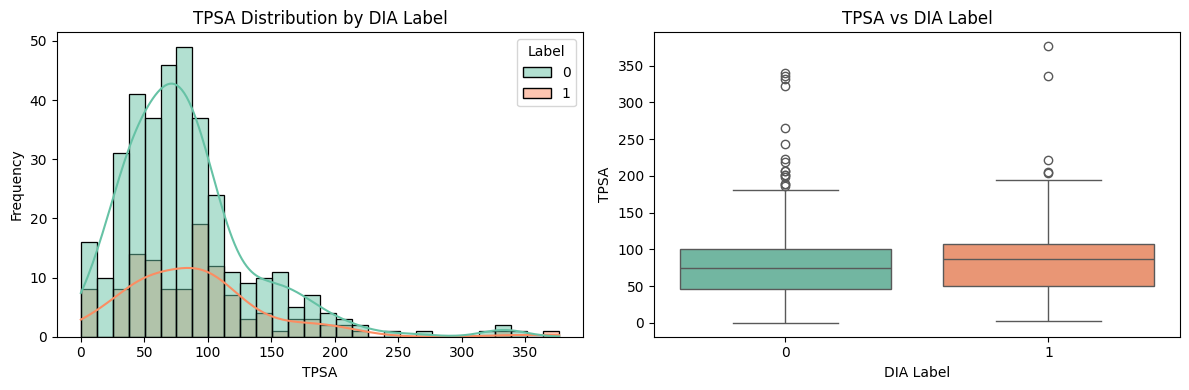

In [127]:
plt.figure(figsize=(12, 4))

# Histogram + KDE by Label
plt.subplot(1, 2, 1)
sns.histplot(data=eda_data, x='TPSA', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('TPSA Distribution by DIA Label')
plt.xlabel('TPSA')
plt.ylabel('Frequency')

# Boxplot by DIA Label
plt.subplot(1, 2, 2)
sns.boxplot(x='Label', y='TPSA', data=eda_data, palette='Set2')
plt.title('TPSA vs DIA Label')
plt.xlabel('DIA Label')
plt.ylabel('TPSA')

plt.tight_layout()
plt.show()



* Observation: DIA-positive curve is broader and shifted slightly to the right.

* Note: Clear drop in frequency after 200. Can drop off the higher values from the dataset

<ipython-input-128-db459419923c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='MolLogP', data=eda_data, palette='Set2')


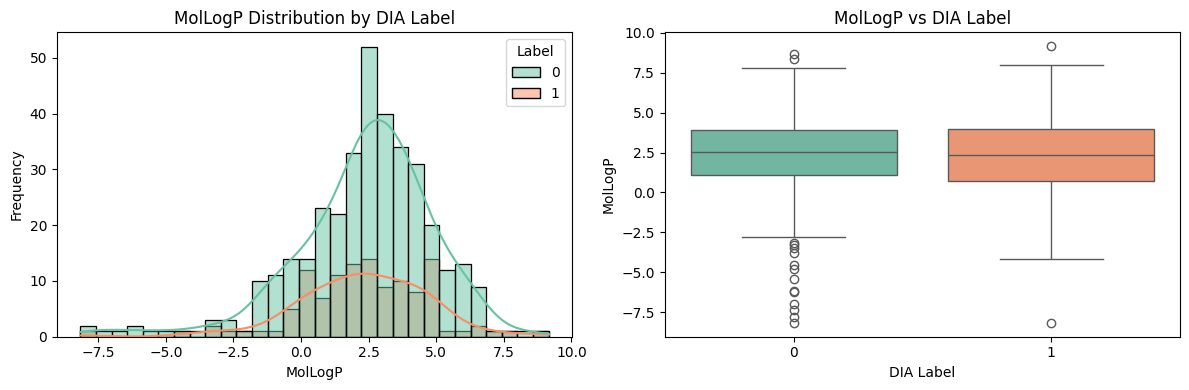

In [128]:
plt.figure(figsize=(12, 4))

# Histogram + KDE by Label
plt.subplot(1, 2, 1)
sns.histplot(data=eda_data, x='MolLogP', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('MolLogP Distribution by DIA Label')
plt.xlabel('MolLogP')
plt.ylabel('Frequency')

# Boxplot by DIA Label
plt.subplot(1, 2, 2)
sns.boxplot(x='Label', y='MolLogP', data=eda_data, palette='Set2')
plt.title('MolLogP vs DIA Label')
plt.xlabel('DIA Label')
plt.ylabel('MolLogP')

plt.tight_layout()
plt.show()



* Observation: Slight overlap; DIA-positive drugs may lean toward higher LogP, but difference is subtle.
* Note: DIA+ almost doesn’t exist below -5.0

<ipython-input-129-a74138a2142f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='NumHAcceptors', data=eda_data, palette='Set2')


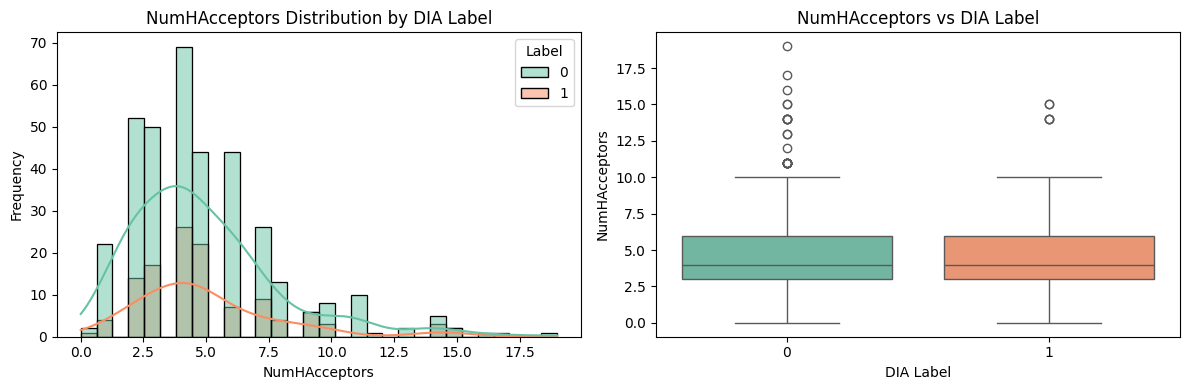

In [129]:
# NumHAcceptors

plt.figure(figsize=(12, 4))

# Histogram + KDE by Label
plt.subplot(1, 2, 1)
sns.histplot(data=eda_data, x='NumHAcceptors', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('NumHAcceptors Distribution by DIA Label')
plt.xlabel('NumHAcceptors')
plt.ylabel('Frequency')

# Boxplot by DIA Label
plt.subplot(1, 2, 2)
sns.boxplot(x='Label', y='NumHAcceptors', data=eda_data, palette='Set2')
plt.title('NumHAcceptors vs DIA Label')
plt.xlabel('DIA Label')
plt.ylabel('NumHAcceptors')

plt.tight_layout()
plt.show()


* Observation: DIA-positive class is broader and slightly right-shifted.

* Note: After 15, frequency drops steeply.

<ipython-input-130-acc4fe7db684>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='NumHDonors', data=eda_data, palette='Set2')


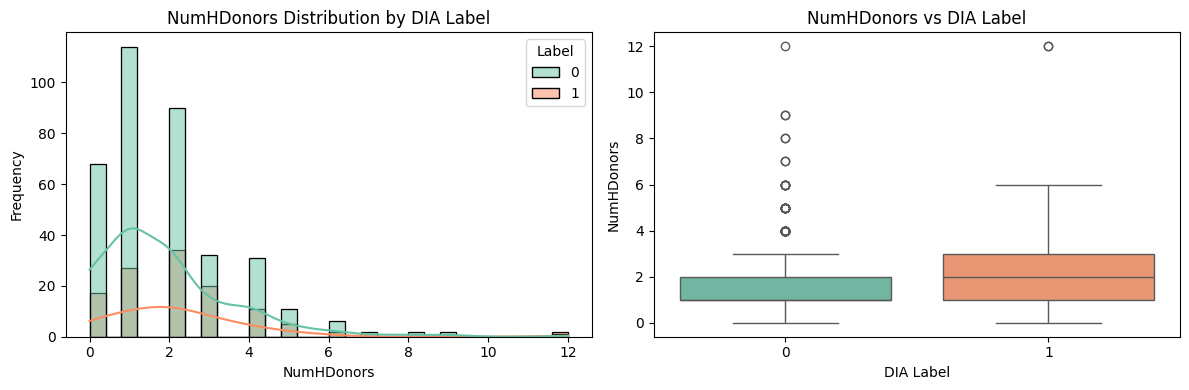

In [130]:
# NumHDonors

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=eda_data, x='NumHDonors', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('NumHDonors Distribution by DIA Label')
plt.xlabel('NumHDonors')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Label', y='NumHDonors', data=eda_data, palette='Set2')
plt.title('NumHDonors vs DIA Label')
plt.xlabel('DIA Label')
plt.ylabel('NumHDonors')

plt.tight_layout()
plt.show()

* Observation: DIA-positive compounds slightly skewed to the right, but some overlap.

* Note: Dropping values greater than 6, there seem to be too and far in between.

<ipython-input-131-64e32ed1417e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='NumRotatableBonds', data=eda_data, palette='Set2')


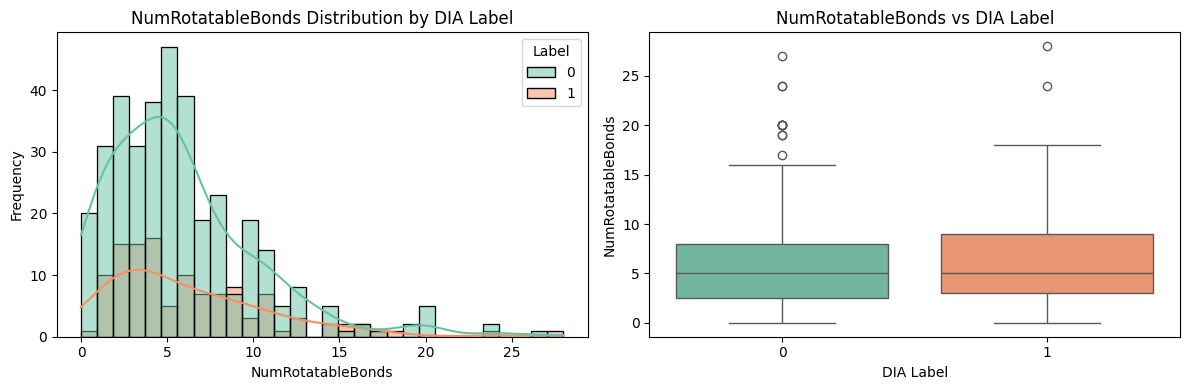

In [131]:
# NumRotatableBonds

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=eda_data, x='NumRotatableBonds', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('NumRotatableBonds Distribution by DIA Label')
plt.xlabel('NumRotatableBonds')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Label', y='NumRotatableBonds', data=eda_data, palette='Set2')
plt.title('NumRotatableBonds vs DIA Label')
plt.xlabel('DIA Label')
plt.ylabel('NumRotatableBonds')

plt.tight_layout()
plt.show()


* Observation: DIA-positive curve is flatter and longer-tailed, indicating more flexibility.

* Note: Drop values greater than 20

<ipython-input-132-2dc771a2e4d2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='NumAromaticRings', data=eda_data, palette='Set2')


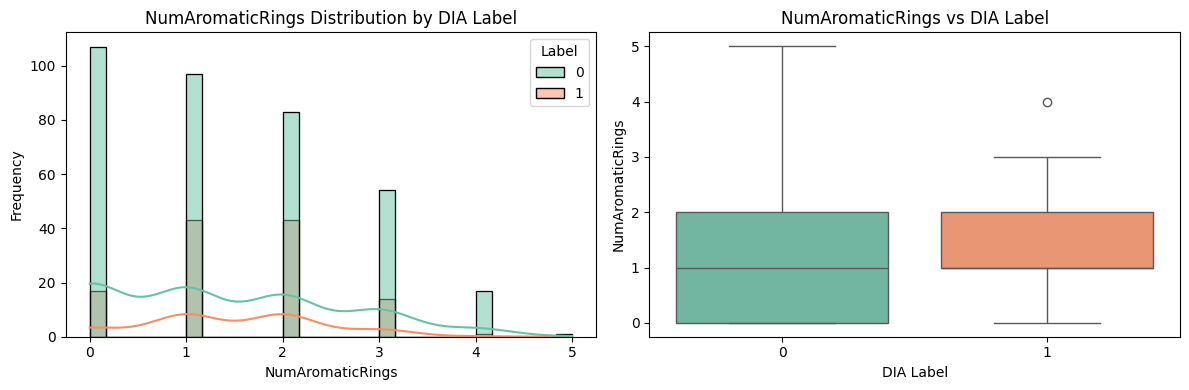

In [132]:
# NumAromaticRings

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=eda_data, x='NumAromaticRings', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('NumAromaticRings Distribution by DIA Label')
plt.xlabel('NumAromaticRings')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Label', y='NumAromaticRings', data=eda_data, palette='Set2')
plt.title('NumAromaticRings vs DIA Label')
plt.xlabel('DIA Label')
plt.ylabel('NumAromaticRings')

plt.tight_layout()
plt.show()


* Observation: Slight enrichment in DIA-positive at 1–2 rings, but overall curves overlap.

* Note: Values ≥ 4 are rare, can be removed

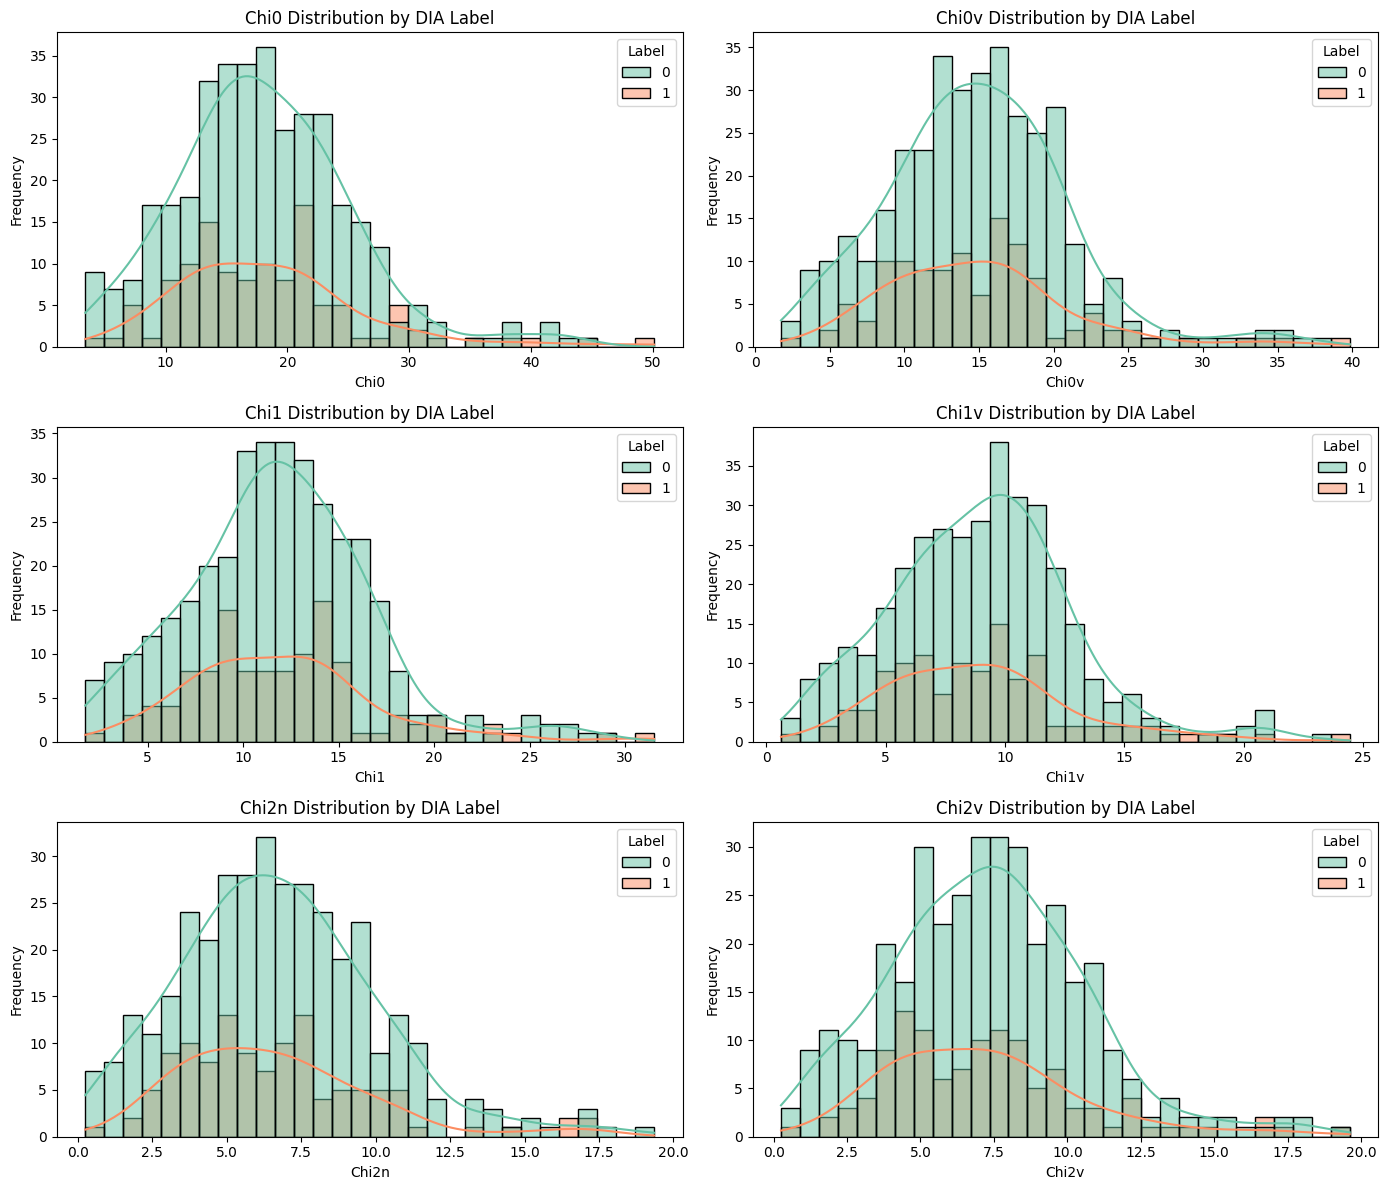

In [133]:
# Plotting the Chi0, Chi0v, Chi1, Chi1v, Chi2n, and Chi2v distributions all together
# Create a figure with 3 rows and 2 columns
plt.figure(figsize=(14, 12))

# Row 1: Chi0 and Chi0v
plt.subplot(3, 2, 1)
sns.histplot(data=eda_data, x='Chi0', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('Chi0 Distribution by DIA Label')
plt.xlabel('Chi0')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
sns.histplot(data=eda_data, x='Chi0v', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('Chi0v Distribution by DIA Label')
plt.xlabel('Chi0v')
plt.ylabel('Frequency')

# Row 2: Chi1 and Chi1v
plt.subplot(3, 2, 3)
sns.histplot(data=eda_data, x='Chi1', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('Chi1 Distribution by DIA Label')
plt.xlabel('Chi1')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
sns.histplot(data=eda_data, x='Chi1v', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('Chi1v Distribution by DIA Label')
plt.xlabel('Chi1v')
plt.ylabel('Frequency')

# Row 3: Chi2n and Chi2v
plt.subplot(3, 2, 5)
sns.histplot(data=eda_data, x='Chi2n', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('Chi2n Distribution by DIA Label')
plt.xlabel('Chi2n')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
sns.histplot(data=eda_data, x='Chi2v', kde=True, hue='Label', palette='Set2', bins=30)
plt.title('Chi2v Distribution by DIA Label')
plt.xlabel('Chi2v')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# The following observations are made for chi0 and chi0v:
* Observation1: For chi0 and chi0v,  Both DIA-positive and negative curves are quite overlapped but DIA-positive is slightly right-shifted.
* Note1: Both chi0 and chi0v are useful features, but we will go with chi0v as they are valence-weighted and are chemically richer. Also, we will filter chi0v feature by removing values >30

# The following observations are made for chi1 and chi1v:
* Observation: Similar pattern as that of chi0/v overlapping but DIA+ is broader and shifted toward higher values.
* Note: Choosing chi1v for similar reasoning as that of chi0/v. Also, after 20, both values taper off

# The following observations are made for chi2n and chi2v:
* Observation: Curves are very close, barely distinguishable.
* Note: Choosing Weak discrimination on their own, will not be using them.

<ipython-input-134-7d4f9fcbf74a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='Chi0v', data=eda_data, palette='Set2')
<ipython-input-134-7d4f9fcbf74a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='Chi1v', data=eda_data, palette='Set2')


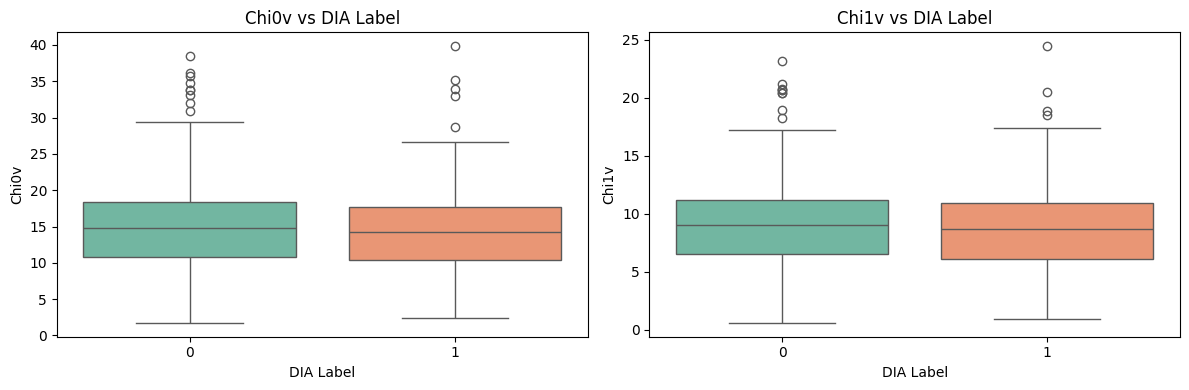

In [134]:
# Representing the boxplots for Chi0v and Chi1v as they are the most important features
# Chi0v and Chi1v boxplots

plt.figure(figsize=(12, 4))

# Chi0v boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Label', y='Chi0v', data=eda_data, palette='Set2')
plt.title('Chi0v vs DIA Label')
plt.xlabel('DIA Label')
plt.ylabel('Chi0v')

# Chi1v boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Label', y='Chi1v', data=eda_data, palette='Set2')
plt.title('Chi1v vs DIA Label')
plt.xlabel('DIA Label')
plt.ylabel('Chi1v')

plt.tight_layout()
plt.show()


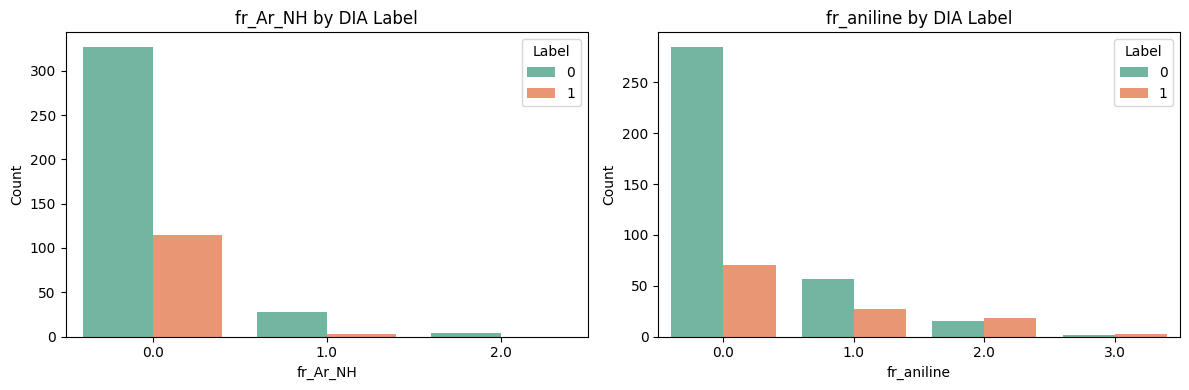

In [135]:
# fr_Ar_NH and fr_aniline

plt.figure(figsize=(12, 4))

# fr_Ar_NH
plt.subplot(1, 2, 1)
sns.countplot(data=eda_data, x='fr_Ar_NH', hue='Label', palette='Set2')
plt.title('fr_Ar_NH by DIA Label')
plt.xlabel('fr_Ar_NH')
plt.ylabel('Count')

# fr_aniline
plt.subplot(1, 2, 2)
sns.countplot(data=eda_data, x='fr_aniline', hue='Label', palette='Set2')
plt.title('fr_aniline by DIA Label')
plt.xlabel('fr_aniline')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


* fr_Ar_NH: For values 1 and 2, barely any values for both categories. Will only use the values for 0
* fr_aniline: Will remove values 3 for same reason as above

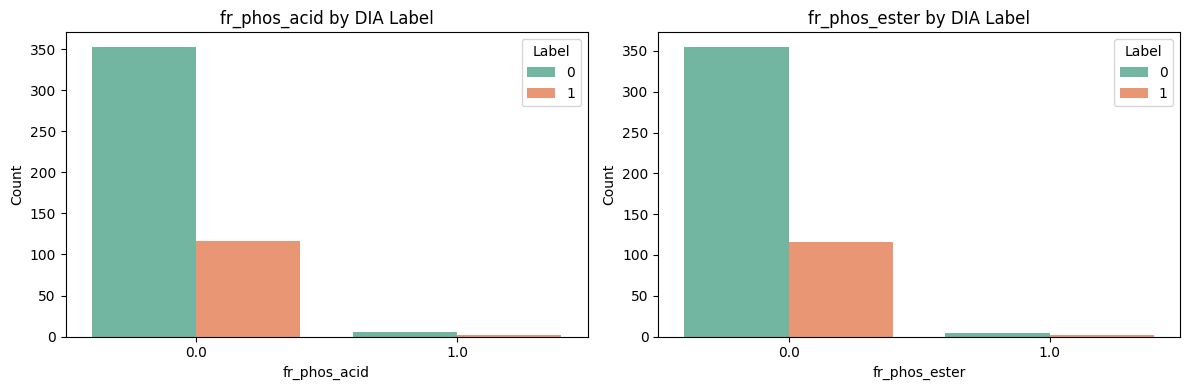

In [136]:
# fr_phos_acid and fr_phos_ester

plt.figure(figsize=(12, 4))

# fr_phos_acid
plt.subplot(1, 2, 1)
sns.countplot(data=eda_data, x='fr_phos_acid', hue='Label', palette='Set2')
plt.title('fr_phos_acid by DIA Label')
plt.xlabel('fr_phos_acid')
plt.ylabel('Count')

# fr_phos_ester
plt.subplot(1, 2, 2)
sns.countplot(data=eda_data, x='fr_phos_ester', hue='Label', palette='Set2')
plt.title('fr_phos_ester by DIA Label')
plt.xlabel('fr_phos_ester')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



* Observation: Due to lack of values for both DIA + and -, will be using only for value 0 for fr_phos_acid and fr_phos_ester

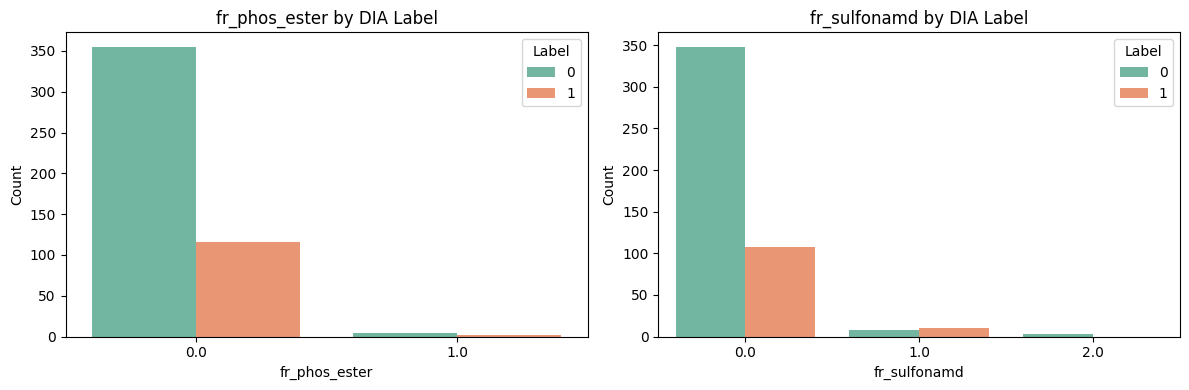

In [137]:
# fr_phos_ester and fr_phos_acid

plt.figure(figsize=(12, 4))

# fr_phos_ester
plt.subplot(1, 2, 1)
sns.countplot(data=eda_data, x='fr_phos_ester', hue='Label', palette='Set2')
plt.title('fr_phos_ester by DIA Label')
plt.xlabel('fr_phos_ester')
plt.ylabel('Count')

# fr_sulfonamd
plt.subplot(1, 2, 2)
sns.countplot(data=eda_data, x='fr_sulfonamd', hue='Label', palette='Set2')
plt.title('fr_sulfonamd by DIA Label')
plt.xlabel('fr_sulfonamd')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


* Observation: Similar to previous visualizations, will be discarding the 1st value for fr_phos_ester and 2nd for sulfonamd

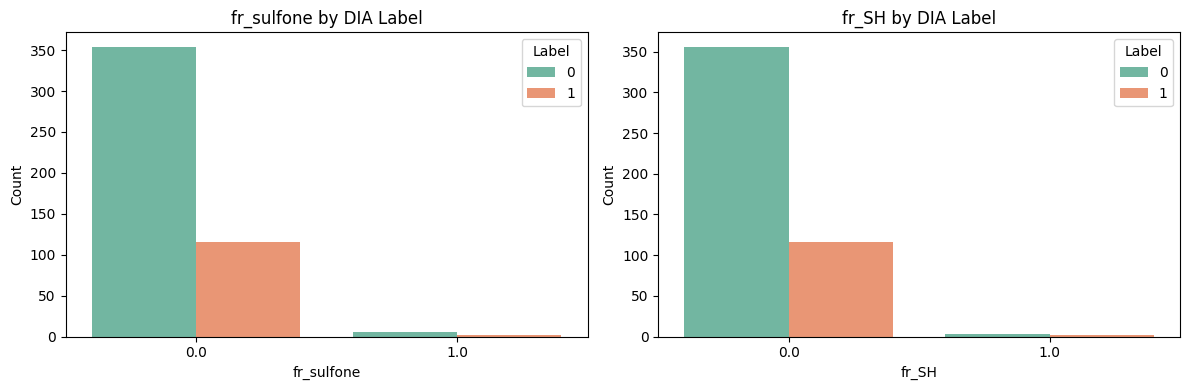

In [138]:
# fr_sulfone and fr_SH

plt.figure(figsize=(12, 4))

# fr_sulfone
plt.subplot(1, 2, 1)
sns.countplot(data=eda_data, x='fr_sulfone', hue='Label', palette='Set2')
plt.title('fr_sulfone by DIA Label')
plt.xlabel('fr_sulfone')
plt.ylabel('Count')

# fr_SH
plt.subplot(1, 2, 2)
sns.countplot(data=eda_data, x='fr_SH', hue='Label', palette='Set2')
plt.title('fr_SH by DIA Label')
plt.xlabel('fr_SH')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



* Observation: Due to lack of values for both DIA + and -, will be using only for value 0 for fr_sulfone and fr_SH

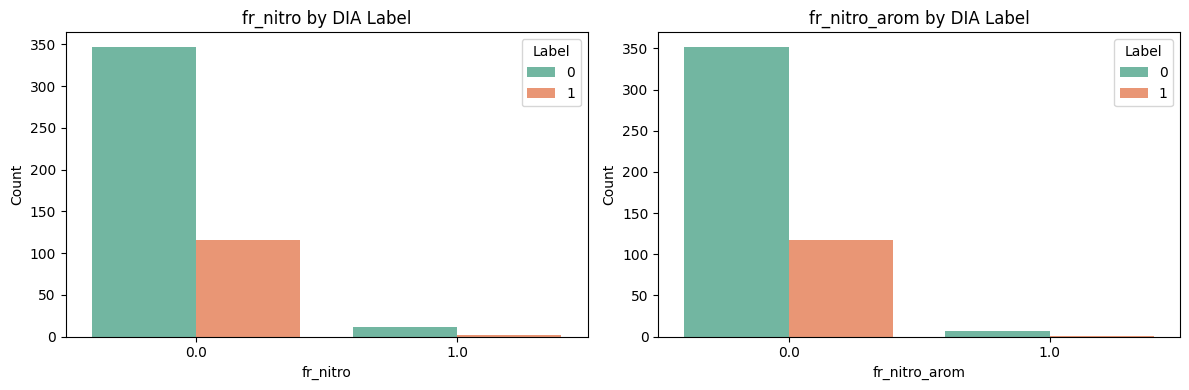

In [139]:
# fr_nitro and fr_nitro_arom

plt.figure(figsize=(12, 4))

# fr_nitro
plt.subplot(1, 2, 1)
sns.countplot(data=eda_data, x='fr_nitro', hue='Label', palette='Set2')
plt.title('fr_nitro by DIA Label')
plt.xlabel('fr_nitro')
plt.ylabel('Count')

# fr_nitro_arom
plt.subplot(1, 2, 2)
sns.countplot(data=eda_data, x='fr_nitro_arom', hue='Label', palette='Set2')
plt.title('fr_nitro_arom by DIA Label')
plt.xlabel('fr_nitro_arom')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


* Observation: Due to lack of values for both DIA + and -, will be using only for value 0 for fr_nitro and fr_nitro_arom

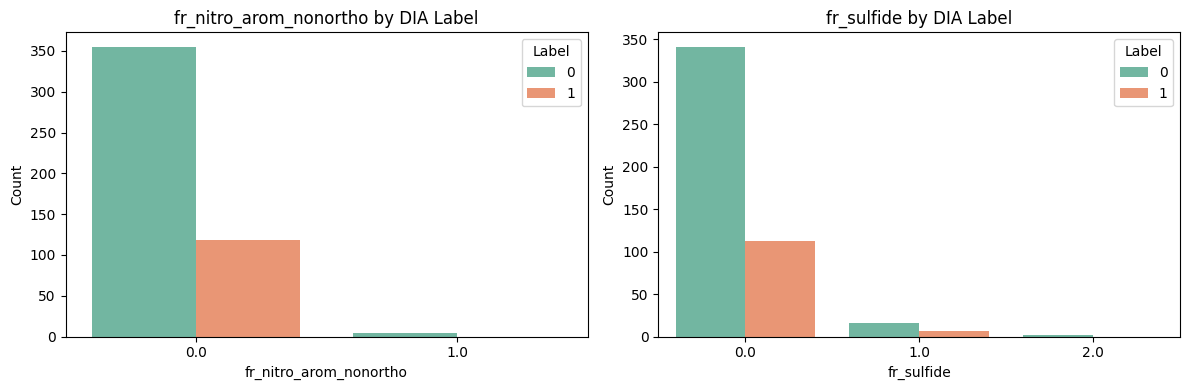

In [140]:
# fr_nitro_arom_nonortho and fr_sulfide

plt.figure(figsize=(12, 4))

# fr_nitro_arom_nonortho
plt.subplot(1, 2, 1)
sns.countplot(data=eda_data, x='fr_nitro_arom_nonortho', hue='Label', palette='Set2')
plt.title('fr_nitro_arom_nonortho by DIA Label')
plt.xlabel('fr_nitro_arom_nonortho')
plt.ylabel('Count')

# fr_sulfide
plt.subplot(1, 2, 2)
sns.countplot(data=eda_data, x='fr_sulfide', hue='Label', palette='Set2')
plt.title('fr_sulfide by DIA Label')
plt.xlabel('fr_sulfide')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


* Observation: Due to lack of values for both DIA + and -, will be using only for value 0 for fr_nitro_arom_nonortho and value 0 and 1 for fr_sulfide

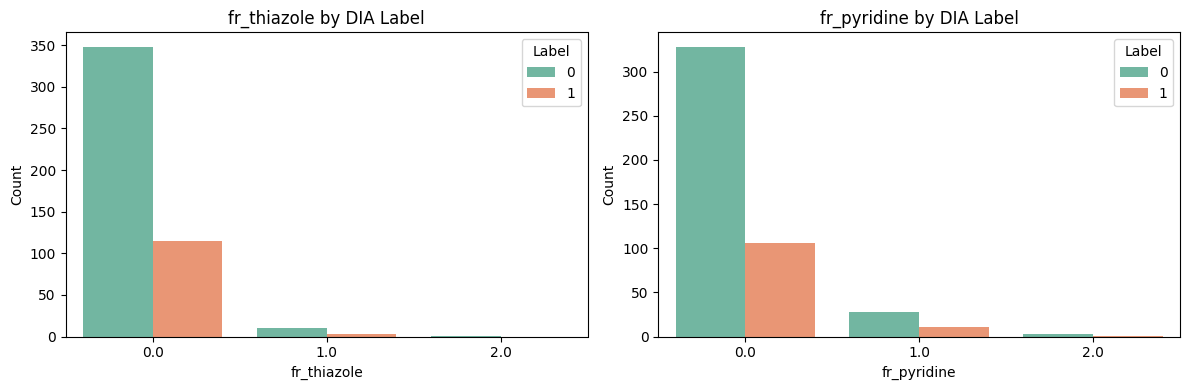

In [141]:
# fr_thiazole and fr_pyridine

plt.figure(figsize=(12, 4))

# fr_thiazole
plt.subplot(1, 2, 1)
sns.countplot(data=eda_data, x='fr_thiazole', hue='Label', palette='Set2')
plt.title('fr_thiazole by DIA Label')
plt.xlabel('fr_thiazole')
plt.ylabel('Count')

# fr_pyridine
plt.subplot(1, 2, 2)
sns.countplot(data=eda_data, x='fr_pyridine', hue='Label', palette='Set2')
plt.title('fr_pyridine by DIA Label')
plt.xlabel('fr_pyridine')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


* Observation: Due to lack of values for both DIA + and -, will be diacarding value 1 and 2 for both fr_thiazole and fr_pyridine

 For label 2, it follows the logic of fr_Ar_NH

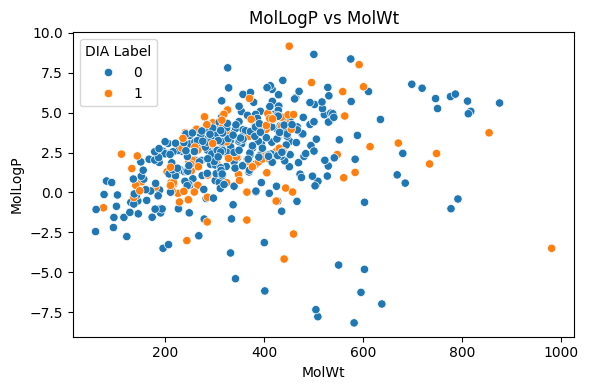

In [142]:
# Hypothesis 1
# MolLogP and MolWt

plt.figure(figsize=(6, 4))
sns.scatterplot(x='MolWt', y='MolLogP', hue='Label', data=eda_data)
plt.title('MolLogP vs MolWt')
plt.xlabel('MolWt')
plt.ylabel('MolLogP')
plt.legend(title='DIA Label')
plt.tight_layout()
plt.show()


* Expected: Mild Positive Correlation
* Observed: Moderate positive correlation

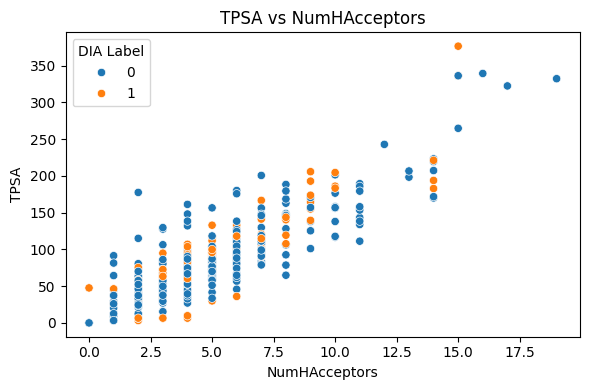

In [143]:
# Hypothesis 2
# NumHAcceptors and TPSA

plt.figure(figsize=(6, 4))
sns.scatterplot(x='NumHAcceptors', y='TPSA', hue='Label', data=eda_data)
plt.title('TPSA vs NumHAcceptors')
plt.xlabel('NumHAcceptors')
plt.ylabel('TPSA')
plt.legend(title='DIA Label')
plt.tight_layout()
plt.show()


* Expected: Strong Positive Correlation
* Observed: Strong positive correlation

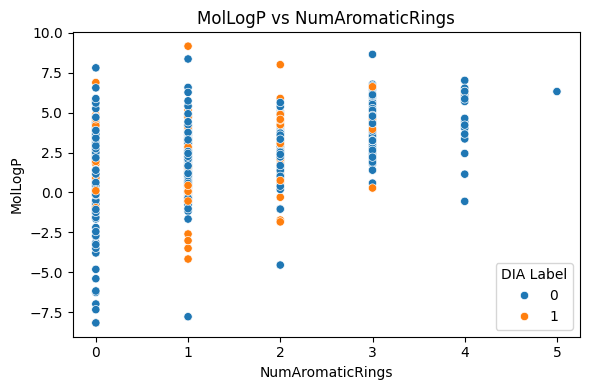

In [144]:
# Hypothesis 3
# MolLogP and NumAromaticRings

plt.figure(figsize=(6, 4))
sns.scatterplot(x='NumAromaticRings', y='MolLogP', hue='Label', data=eda_data)
plt.title('MolLogP vs NumAromaticRings')
plt.xlabel('NumAromaticRings')
plt.ylabel('MolLogP')
plt.legend(title='DIA Label')
plt.tight_layout()
plt.show()


* Expected: Weak-Moderate Positive Correlation
* Observed: Weak to moderate positive trend

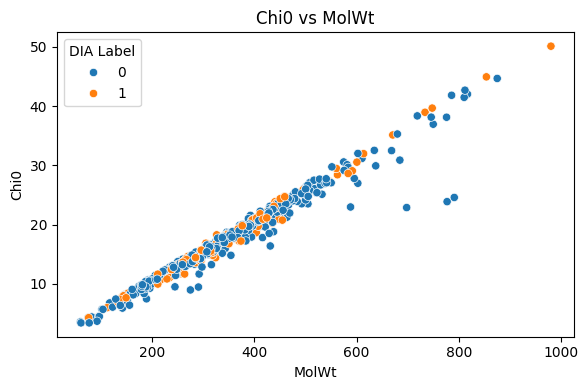

In [145]:
# Hypothesis 4
# Chi0 and MolWt

plt.figure(figsize=(6, 4))
sns.scatterplot(x='MolWt', y='Chi0', hue='Label', data=eda_data)
plt.title('Chi0 vs MolWt')
plt.xlabel('MolWt')
plt.ylabel('Chi0')
plt.legend(title='DIA Label')
plt.tight_layout()
plt.show()


* Expected: Strong Positive Correlation
* Observed: These two are strongly correlated — Chi0 increases with molecular size

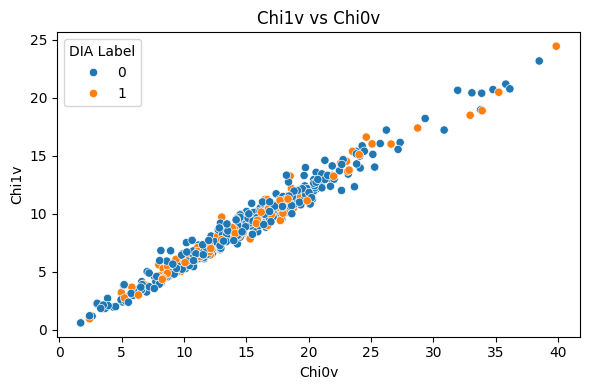

In [146]:
# Hypothesis 5
# Chi1v and Chi0v

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Chi0v', y='Chi1v', hue='Label', data=eda_data)
plt.title('Chi1v vs Chi0v')
plt.xlabel('Chi0v')
plt.ylabel('Chi1v')
plt.legend(title='DIA Label')
plt.tight_layout()
plt.show()


* Expected: Moderate-Strong Positive Correlation
* Observed: Plot shows a clear upward trend, hypothesis holds true

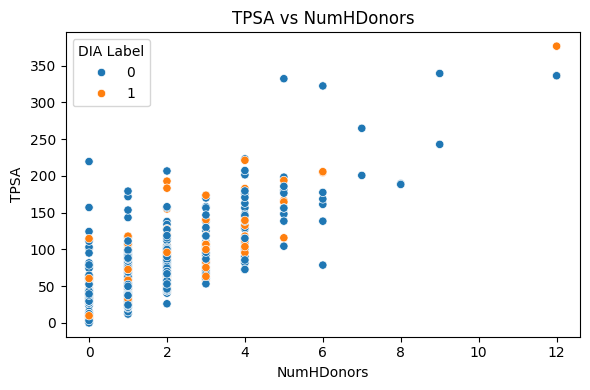

In [147]:
# Hypothesis 6
# NumHDonors and TPSA

plt.figure(figsize=(6, 4))
sns.scatterplot(x='NumHDonors', y='TPSA', hue='Label', data=eda_data)
plt.title('TPSA vs NumHDonors')
plt.xlabel('NumHDonors')
plt.ylabel('TPSA')
plt.legend(title='DIA Label')
plt.tight_layout()
plt.show()


* Expected: Strong Positive Correlation
* Observed: TPSA increases with more hydrogen bond donors.

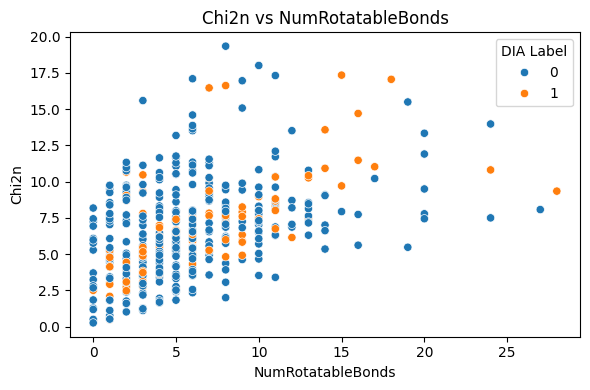

In [148]:
# Hypothesis 7
# Chi2n and NumRotatableBonds

plt.figure(figsize=(6, 4))
sns.scatterplot(x='NumRotatableBonds', y='Chi2n', hue='Label', data=eda_data)
plt.title('Chi2n vs NumRotatableBonds')
plt.xlabel('NumRotatableBonds')
plt.ylabel('Chi2n')
plt.legend(title='DIA Label')
plt.tight_layout()
plt.show()


* Expected: Weak-Moderate Positive Correlation
* Observed: The relationship is noisy, may not be that useful

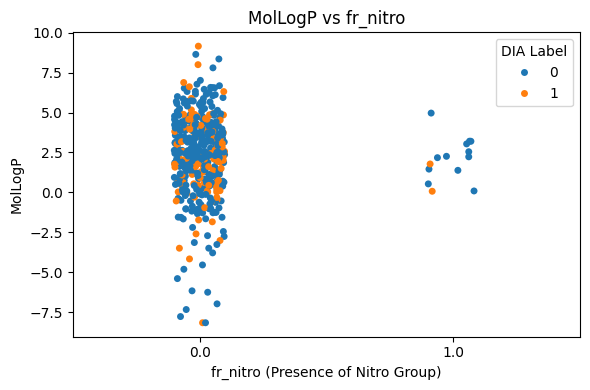

In [149]:
# Hypothesis 8
# fr_nitro and MolLogP

plt.figure(figsize=(6, 4))
sns.stripplot(x='fr_nitro', y='MolLogP', hue='Label', data=eda_data, jitter=True)
plt.title('MolLogP vs fr_nitro')
plt.xlabel('fr_nitro (Presence of Nitro Group)')
plt.ylabel('MolLogP')
plt.legend(title='DIA Label')
plt.tight_layout()
plt.show()


* Expected: Possibly Lower LogP in Nitro-containing Molecules
* Observed: Can be disregarded

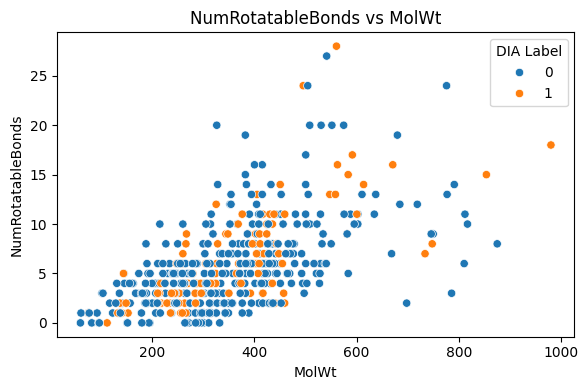

In [150]:
# Hypothesis 9
# NumRotatableBonds and MolWt
plt.figure(figsize=(6, 4))
sns.scatterplot(x='MolWt', y='NumRotatableBonds', hue='Label', data=eda_data)
plt.title('NumRotatableBonds vs MolWt')
plt.xlabel('MolWt')
plt.ylabel('NumRotatableBonds')
plt.legend(title='DIA Label')
plt.tight_layout()
plt.show()


* Expected: Moderate Positive Correlation
* Observed: Hypothesis holds true

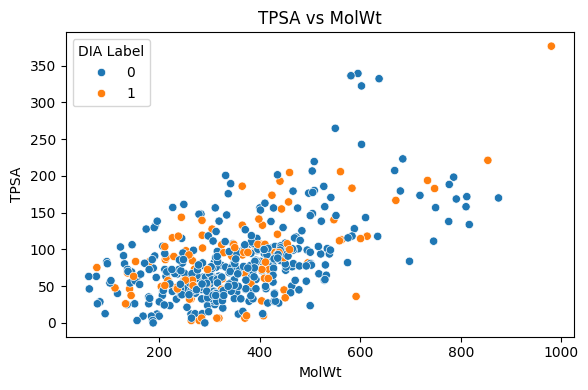

In [151]:
# Hypothesis 10
# TPSA vs MolWt

plt.figure(figsize=(6, 4))
sns.scatterplot(x='MolWt', y='TPSA', hue='Label', data=eda_data)
plt.title('TPSA vs MolWt')
plt.xlabel('MolWt')
plt.ylabel('TPSA')
plt.legend(title='DIA Label')
plt.tight_layout()
plt.show()


* Expected: Moderate positive correlation
* Observed: There is a moderate positive correlation, hypothesis holds true

In [152]:
# Making all the necessary changes to the dataset as observed in the Data Exploration
eda_data = eda_data[
    (eda_data['MolWt'] <= 800) &
    (eda_data['TPSA'] <= 200) &
    (eda_data['MolLogP'] >= -5) &
    (eda_data['NumHAcceptors'] <= 15) &
    (eda_data['NumHDonors'] <= 6) &
    (eda_data['NumRotatableBonds'] <= 20) &
    (eda_data['NumAromaticRings'] <= 3) &
    (eda_data['Chi0v'] <= 30) &
    (eda_data['Chi1v'] <= 25) &
    (eda_data['fr_Ar_NH'].isin([0])) &
    (eda_data['fr_aniline'].isin([0, 1])) &
    (eda_data['fr_phos_acid'].isin([0])) &
    (eda_data['fr_phos_ester'].isin([0])) &
    (eda_data['fr_sulfonamd'].isin([0, 1])) &
    (eda_data['fr_sulfone'].isin([0])) &
    (eda_data['fr_sulfide'].isin([0, 1])) &
    (eda_data['fr_thiazole'].isin([0])) &
    (eda_data['fr_pyridine'].isin([0])) &
    (eda_data['fr_nitro_arom'].isin([0])) &
    (eda_data['fr_nitro_arom_nonortho'].isin([0])) &
    (eda_data['fr_nitro'].isin([0])) &
    (eda_data['fr_SH'].isin([0]))
]
X_train= eda_data.copy()
X_train.drop(columns=['Label'], inplace=True) # Since the Label column is not needed for training
Y_train = Y_train.loc[eda_data.index]



In [153]:

X_train.shape, Y_train.shape


((300, 27), (300,))

In [154]:
X_test.head()

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.484,743.207,21.466,18.764,18.764,14.292,12.106,12.106,10.736,10.736,...,0,0,0,0,0,0,0,0,0,0
1,1.472,868.947,21.140,16.736,17.553,14.453,10.268,11.084,7.662,8.746,...,0,0,0,0,0,0,0,0,0,0
2,0.837,1409.004,39.189,32.904,32.904,26.011,20.941,20.941,18.816,18.816,...,0,0,0,0,0,0,0,0,0,0
3,2.406,621.298,13.828,10.297,10.297,9.092,5.847,5.847,4.217,4.217,...,0,0,0,0,0,0,0,0,0,0
4,1.320,2127.996,37.955,30.849,31.666,25.910,18.066,19.115,14.930,16.060,...,1,0,0,0,0,0,0,0,0,0


In [155]:
X_test = X_test[X_train.columns]
X_test.shape

(120, 27)

# Data Modelling

Training Accuracy: 1.0
Test Accuracy: 0.6833333333333333
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00        66

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        90
           1       0.39      0.50      0.44        30

    accuracy                           0.68       120
   macro avg       0.61      0.62      0.61       120
weighted avg       0.71      0.68      0.69       120

ROC AUC Score (Train): 1.0
ROC AUC Score (Test): 0.6222222222222222


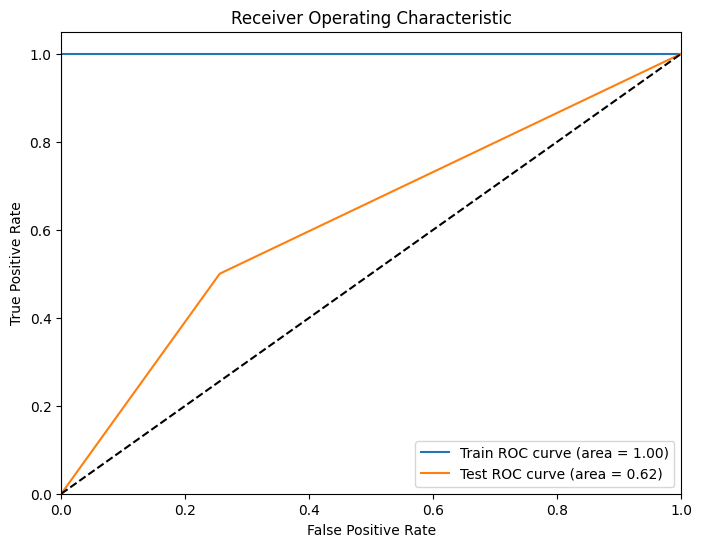

In [156]:
# Building the model without SMOTE for the moment
# Decision Tree Classifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf= DecisionTreeClassifier(random_state=42)
# Fit the model
clf.fit(X_train, Y_train)

# Predict on the training set
Y_train_pred = clf.predict(X_train)

# Predict on the test set
Y_test_pred = clf.predict(X_test)

# Check the accuracy
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))

# Check the classification report
print("Classification Report (Train):\n", classification_report(Y_train, Y_train_pred))
print("Classification Report (Test):\n", classification_report(Y_test, Y_test_pred))

# ROC AUC Score
print("ROC AUC Score (Train):", roc_auc_score(Y_train, Y_train_pred))
print("ROC AUC Score (Test):", roc_auc_score(Y_test, Y_test_pred))
# Plotting ROC Curve
fpr_train, tpr_train, _ = roc_curve(Y_train, clf.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(Y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_score(Y_train, Y_train_pred))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_score(Y_test, Y_test_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Training Accuracy: 0.8266666666666667
Test Accuracy: 0.7166666666666667
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       234
           1       0.65      0.47      0.54        66

    accuracy                           0.83       300
   macro avg       0.75      0.70      0.72       300
weighted avg       0.81      0.83      0.82       300

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        90
           1       0.43      0.40      0.41        30

    accuracy                           0.72       120
   macro avg       0.62      0.61      0.61       120
weighted avg       0.71      0.72      0.71       120

ROC AUC Score (Train): 0.6985236985236986
ROC AUC Score (Test): 0.611111111111111


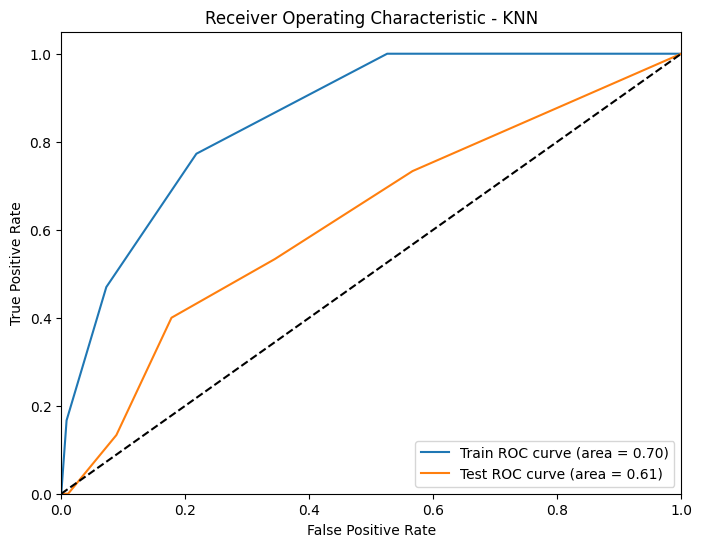

In [157]:
# KNN without SMOTE

# Convert to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_np, Y_train)

# Predictions
Y_train_pred_knn = knn.predict(X_train_np)
Y_test_pred_knn = knn.predict(X_test_np)

# Accuracy
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred_knn))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred_knn))


# Classification Reports
print("Classification Report (Train):\n", classification_report(Y_train, Y_train_pred_knn))
print("Classification Report (Test):\n", classification_report(Y_test, Y_test_pred_knn))

# ROC AUC Scores
print("ROC AUC Score (Train):", roc_auc_score(Y_train, Y_train_pred_knn))
print("ROC AUC Score (Test):", roc_auc_score(Y_test, Y_test_pred_knn))

# ROC Curves
fpr_train_knn, tpr_train_knn, _ = roc_curve(Y_train, knn.predict_proba(X_train_np)[:, 1])
fpr_test_knn, tpr_test_knn, _ = roc_curve(Y_test, knn.predict_proba(X_test_np)[:, 1])

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_knn, tpr_train_knn, label='Train ROC curve (area = %0.2f)' % roc_auc_score(Y_train, Y_train_pred_knn))
plt.plot(fpr_test_knn, tpr_test_knn, label='Test ROC curve (area = %0.2f)' % roc_auc_score(Y_test, Y_test_pred_knn))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc='lower right')
plt.show()


In [158]:
# Using SMOTE to balance the dataset

# Initialize SMOTE
smote = SMOTE(random_state=42)
# Fit SMOTE to the training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

Class distribution after SMOTE: Counter({0: 234, 1: 234})


Training Accuracy (SMOTE): 1.0
Test Accuracy (SMOTE): 0.7166666666666667
Classification Report (Test - SMOTE):
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        90
           1       0.43      0.43      0.43        30

    accuracy                           0.72       120
   macro avg       0.62      0.62      0.62       120
weighted avg       0.72      0.72      0.72       120

ROC AUC Score (Train - SMOTE): 1.0
ROC AUC Score (Test - SMOTE): 0.6222222222222222


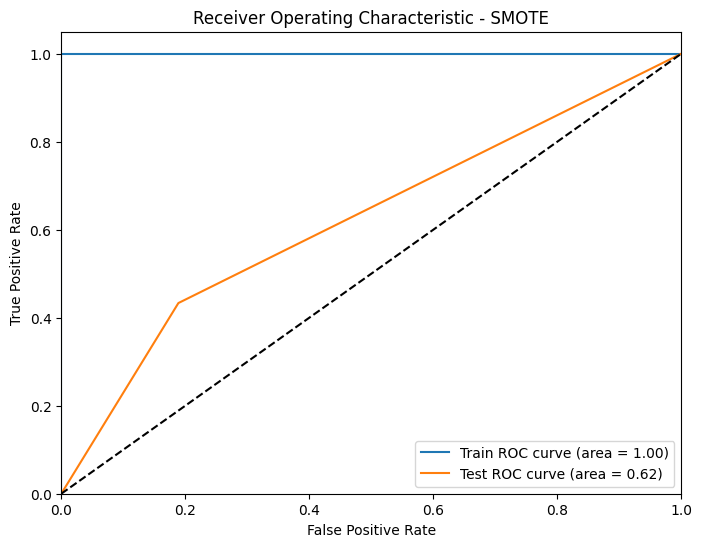

In [184]:
# Initialize the Decision Tree Classifier

clf_smote = DecisionTreeClassifier(random_state=42)
# Fit the model
clf_smote.fit(X_train_resampled, Y_train_resampled)
# Predict on the training set
Y_train_pred_smote = clf_smote.predict(X_train_resampled)
# Predict on the test set
Y_test_pred_smote = clf_smote.predict(X_test)

# Check the accuracy
print("Training Accuracy (SMOTE):", accuracy_score(Y_train_resampled, Y_train_pred_smote))
print("Test Accuracy (SMOTE):", accuracy_score(Y_test, Y_test_pred_smote))

# Check the classification report
print("Classification Report (Test - SMOTE):\n", classification_report(Y_test, Y_test_pred_smote))
# ROC AUC Score
print("ROC AUC Score (Train - SMOTE):", roc_auc_score(Y_train_resampled, Y_train_pred_smote))
print("ROC AUC Score (Test - SMOTE):", roc_auc_score(Y_test, Y_test_pred_smote))

# Plotting ROC Curve
fpr_train_smote, tpr_train_smote, _ = roc_curve(Y_train_resampled, clf_smote.predict_proba(X_train_resampled)[:, 1])
fpr_test_smote, tpr_test_smote, _ = roc_curve(Y_test, clf_smote.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_smote, tpr_train_smote, label='Train ROC curve (area = %0.2f)' % roc_auc_score(Y_train_resampled, Y_train_pred_smote))
plt.plot(fpr_test_smote, tpr_test_smote, label='Test ROC curve (area = %0.2f)' % roc_auc_score(Y_test, Y_test_pred_smote))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SMOTE')
plt.legend(loc='lower right')
plt.show()

Training Accuracy (SMOTE): 0.8931623931623932
Test Accuracy (SMOTE): 0.625
Classification Report (Test - SMOTE):
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        90
           1       0.37      0.70      0.48        30

    accuracy                           0.62       120
   macro avg       0.61      0.65      0.59       120
weighted avg       0.73      0.62      0.65       120

ROC AUC Score (Train - SMOTE): 0.8931623931623932
ROC AUC Score (Test - SMOTE): 0.65


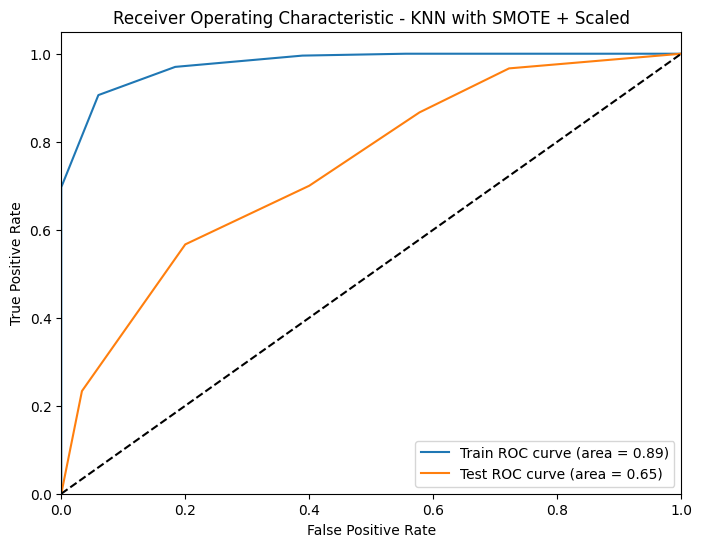

In [183]:
# Initialise the KNN Classifier

# Step 1: Scale features after SMOTE
scaler = StandardScaler()
X_train_scaled_smote = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler!

# Step 2: Train KNN on scaled SMOTE data
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_scaled_smote, Y_train_resampled)

# Step 3: Predictions
Y_train_pred_knn_smote = knn_smote.predict(X_train_scaled_smote)
Y_test_pred_knn_smote = knn_smote.predict(X_test_scaled)

# Step 4: Accuracy
print("Training Accuracy (SMOTE):", accuracy_score(Y_train_resampled, Y_train_pred_knn_smote))
print("Test Accuracy (SMOTE):", accuracy_score(Y_test, Y_test_pred_knn_smote))

# Step 6: Classification Reports
print("Classification Report (Test - SMOTE):\n", classification_report(Y_test, Y_test_pred_knn_smote))

# Step 7: ROC AUC Scores
print("ROC AUC Score (Train - SMOTE):", roc_auc_score(Y_train_resampled, Y_train_pred_knn_smote))
print("ROC AUC Score (Test - SMOTE):", roc_auc_score(Y_test, Y_test_pred_knn_smote))

# Step 8: ROC Curves
fpr_train_knn_smote, tpr_train_knn_smote, _ = roc_curve(Y_train_resampled, knn_smote.predict_proba(X_train_scaled_smote)[:, 1])
fpr_test_knn_smote, tpr_test_knn_smote, _ = roc_curve(Y_test, knn_smote.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_knn_smote, tpr_train_knn_smote, label='Train ROC curve (area = %0.2f)' % roc_auc_score(Y_train_resampled, Y_train_pred_knn_smote))
plt.plot(fpr_test_knn_smote, tpr_test_knn_smote, label='Test ROC curve (area = %0.2f)' % roc_auc_score(Y_test, Y_test_pred_knn_smote))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN with SMOTE + Scaled')
plt.legend(loc='lower right')
plt.show()

# Checking for StratifiedKFold and RepeatedStratifiedKFold just to see how they work and check for my generalized models for purely unseen data

StratifiedKFold Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       234
           1       0.72      0.91      0.80       234

    accuracy                           0.78       468
   macro avg       0.80      0.78      0.77       468
weighted avg       0.80      0.78      0.77       468



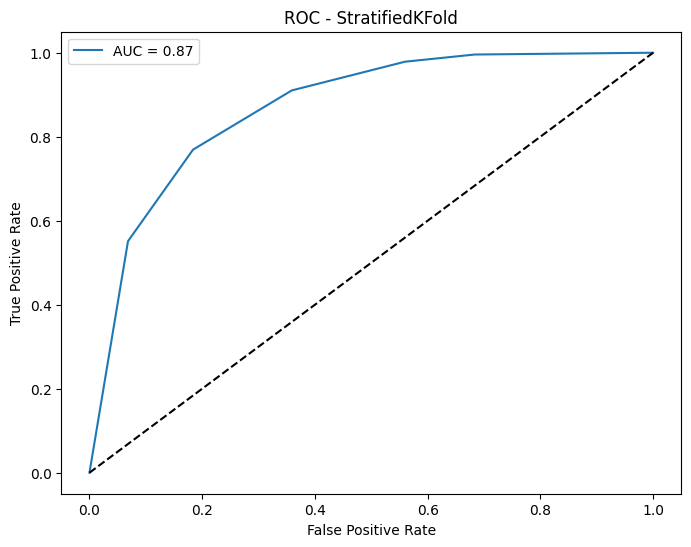

In [175]:
# StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, Y_train)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

final_y_true, final_y_pred, final_y_prob = [], [], []

for train_idx, test_idx in skf.split(X_res, y_res):
    X_fold_train = X_res.iloc[train_idx]
    X_fold_test = X_res.iloc[test_idx]
    y_fold_train = y_res.iloc[train_idx]
    y_fold_test = y_res.iloc[test_idx]

    model.fit(X_fold_train, y_fold_train)
    y_pred = model.predict(X_fold_test)
    y_prob = model.predict_proba(X_fold_test)[:, 1]

    final_y_true.extend(y_fold_test)
    final_y_pred.extend(y_pred)
    final_y_prob.extend(y_prob)

# Report and ROC
print("StratifiedKFold Classification Report:")
print(classification_report(final_y_true, final_y_pred))

fpr, tpr, _ = roc_curve(final_y_true, final_y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(final_y_true, final_y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC - StratifiedKFold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


RepeatedStratifiedKFold Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       702
           1       0.73      0.92      0.81       702

    accuracy                           0.78      1404
   macro avg       0.81      0.78      0.78      1404
weighted avg       0.81      0.78      0.78      1404



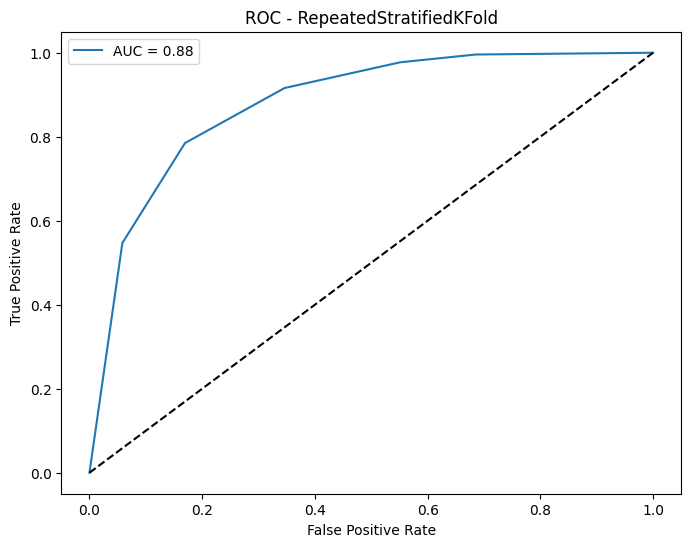

In [176]:
# RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

final_y_true, final_y_pred, final_y_prob = [], [], []

for train_idx, test_idx in rskf.split(X_res, y_res):
    X_fold_train = X_res.iloc[train_idx]
    X_fold_test = X_res.iloc[test_idx]
    y_fold_train = y_res.iloc[train_idx]
    y_fold_test = y_res.iloc[test_idx]

    model.fit(X_fold_train, y_fold_train)
    y_pred = model.predict(X_fold_test)
    y_prob = model.predict_proba(X_fold_test)[:, 1]

    final_y_true.extend(y_fold_test)
    final_y_pred.extend(y_pred)
    final_y_prob.extend(y_prob)

print("RepeatedStratifiedKFold Classification Report:")
print(classification_report(final_y_true, final_y_pred))

fpr, tpr, _ = roc_curve(final_y_true, final_y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(final_y_true, final_y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC - RepeatedStratifiedKFold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Seeing that RepeatedStratifiedKFold works well, I will use this for building the generalised model for unseen data

k = 1 → AUC = 0.8818
k = 2 → AUC = 0.9071
k = 3 → AUC = 0.9086
k = 4 → AUC = 0.8980
k = 5 → AUC = 0.8839
k = 6 → AUC = 0.8702
k = 7 → AUC = 0.8644
k = 8 → AUC = 0.8645
k = 9 → AUC = 0.8640
k = 10 → AUC = 0.8638
k = 11 → AUC = 0.8616
k = 12 → AUC = 0.8583
k = 13 → AUC = 0.8524
k = 14 → AUC = 0.8457
k = 15 → AUC = 0.8442
k = 16 → AUC = 0.8380
k = 17 → AUC = 0.8355
k = 18 → AUC = 0.8304
k = 19 → AUC = 0.8272
k = 20 → AUC = 0.8226

✅ Best k = 3 (AUC = 0.9086)
📋 Final Classification Report (on Test Data):
              precision    recall  f1-score   support

           0       0.83      0.58      0.68        90
           1       0.33      0.63      0.44        30

    accuracy                           0.59       120
   macro avg       0.58      0.61      0.56       120
weighted avg       0.70      0.59      0.62       120



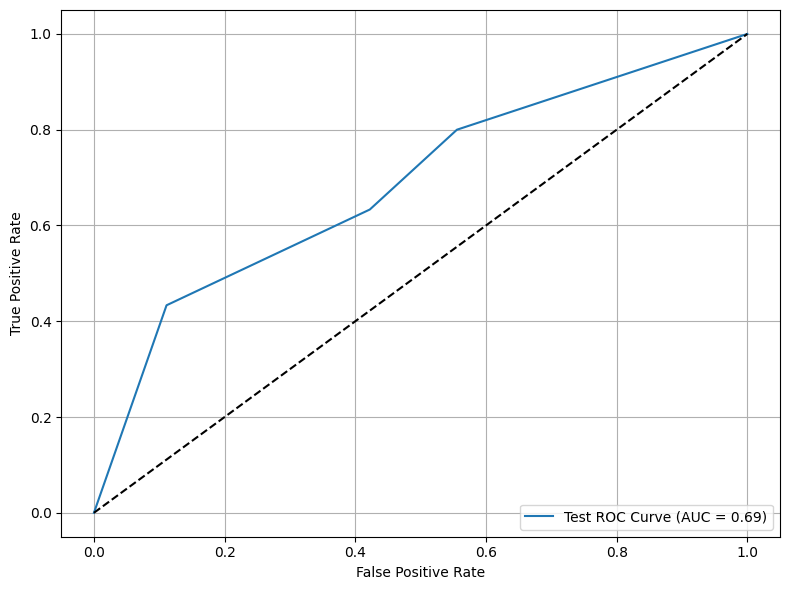

In [177]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

best_k = None
best_auc = 0
k_auc_scores = {}

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_true_all, y_prob_all = [], []

    for train_idx, test_idx in rskf.split(X_train_scaled_smote, Y_train_resampled):
        X_fold_train = X_train_scaled_smote[train_idx]
        X_fold_test = X_train_scaled_smote[test_idx]
        y_fold_train = Y_train_resampled.iloc[train_idx]
        y_fold_test = Y_train_resampled.iloc[test_idx]

        knn.fit(X_fold_train, y_fold_train)
        y_prob = knn.predict_proba(X_fold_test)[:, 1]
        y_true_all.extend(y_fold_test)
        y_prob_all.extend(y_prob)

    auc = roc_auc_score(y_true_all, y_prob_all)
    k_auc_scores[k] = auc
    print(f"k = {k} → AUC = {auc:.4f}")

    if auc > best_auc:
        best_auc = auc
        best_k = k

print(f"\n✅ Best k = {best_k} (AUC = {best_auc:.4f})")


from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Train the final model on full resampled+scaled data
knn_smote_best = KNeighborsClassifier(n_neighbors=best_k)
knn_smote_best.fit(X_train_scaled_smote, Y_train_resampled)

y_test_pred_final = knn_smote_best.predict(X_test_scaled)
y_test_prob_final = knn_smote_best.predict_proba(X_test_scaled)[:, 1]

print("📋 Final Classification Report (on Test Data):")
print(classification_report(Y_test, y_test_pred_final))

fpr_test, tpr_test, _ = roc_curve(Y_test, y_test_prob_final)
auc_test = roc_auc_score(Y_test, y_test_prob_final)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f"Test ROC Curve (AUC = {auc_test:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



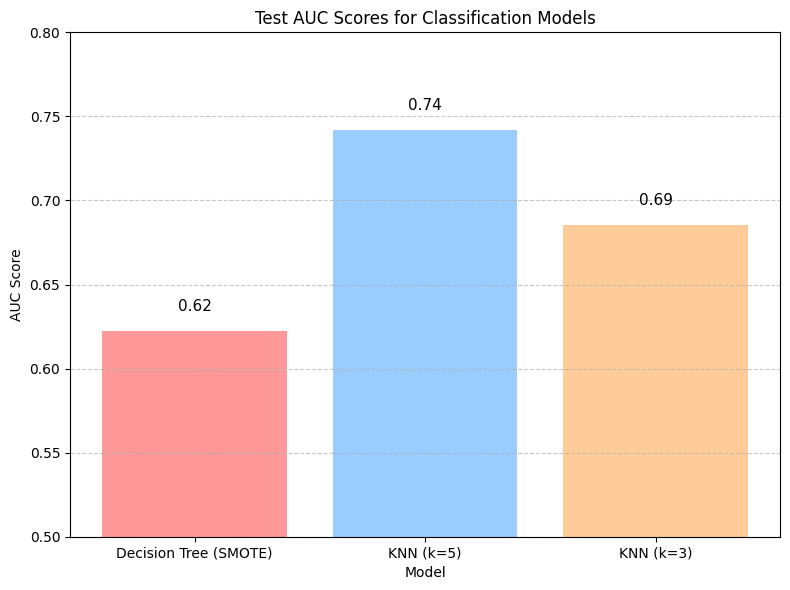

In [181]:
# Visualizing the AUC for all models
import matplotlib.pyplot as plt

# AUC values
models = ['Decision Tree (SMOTE)', 'KNN (k=5)', 'KNN (k=3)']
auc_scores = [0.6222, 0.7420, 0.6856]

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, auc_scores, color=['#FF9999', '#99CCFF', '#FFCC99'])

# Annotate bars
for bar, auc in zip(bars, auc_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f'{auc:.2f}',
             ha='center', va='bottom', fontsize=11)

# Labels and styling
plt.ylim(0.5, 0.8)
plt.title('Test AUC Scores for Classification Models')
plt.ylabel('AUC Score')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()
